# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

C:\Users\peng\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 10s 1us/step


In [3]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [6]:
x_Train_normalize.shape

(60000, 784)

In [7]:
y_Train_OneHot.shape

(60000, 10)

# 建立模型

In [8]:
from keras.layers import Input , Dense
from keras.models import Model

In [17]:
#建立模型
model_input = Input(shape=(784 , ) , dtype = 'float32' , name = 'main_input')
layer_1 = Dense(64 , activation = 'sigmoid')(model_input)
layer_2 = Dense(10 , activation = 'softmax')(layer_1)

# 訓練模型

In [19]:
model = Model(inputs = model_input ,
              outputs = layer_2)

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [21]:
train_history = model.fit(x = x_Train_normalize,
                          y = y_Train_OneHot , 
                          validation_split = 0.2, 
                          epochs = 10, 
                          batch_size = 32,
                          verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 81us/step - loss: 0.5214 - acc: 0.8759 - val_loss: 0.2684 - val_acc: 0.9267
Epoch 2/10
48000/48000 [==============================] - 3s 71us/step - loss: 0.2451 - acc: 0.9309 - val_loss: 0.2040 - val_acc: 0.9430
Epoch 3/10
48000/48000 [==============================] - 3s 70us/step - loss: 0.1909 - acc: 0.9453 - val_loss: 0.1746 - val_acc: 0.9504
Epoch 4/10
48000/48000 [==============================] - 4s 80us/step - loss: 0.1593 - acc: 0.9549 - val_loss: 0.1584 - val_acc: 0.9553
Epoch 5/10
48000/48000 [==============================] - 3s 72us/step - loss: 0.1354 - acc: 0.9615 - val_loss: 0.1422 - val_acc: 0.9613
Epoch 6/10
48000/48000 [==============================] - 3s 69us/step - loss: 0.1173 - acc: 0.9673 - val_loss: 0.1319 - val_acc: 0.9622
Epoch 7/10
48000/48000 [==============================] - 4s 75us/step - loss: 0.1030 - acc: 0.9713 - val_loss: 0.1257 - val_acc

# 以圖形顯示訓練過程

In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history , train , validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

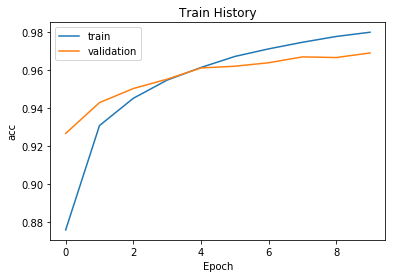

In [23]:
show_train_history(train_history , 'acc' , 'val_acc')

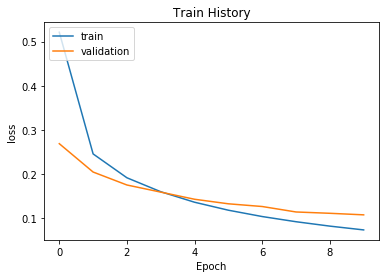

In [24]:
show_train_history(train_history , 'loss' , 'val_loss')

# 評估模型準確率

In [25]:
scores = model.evaluate(x_Test_normalize , y_Test_OneHot)
print()
print('accuracy=' , scores[1])

10000/10000 [==============================] - 0s 30us/step

accuracy= 0.9711
